In [55]:
"""Compare one menthol ban scenario to one status quo scenario"""

'Compare one menthol ban scenario to one status quo scenario'

In [56]:
import pandas as pd
import numpy as np
import os
from glob import glob
from matplotlib import pyplot as plt

In [57]:
base_dir = "/Users/nick/Documents/Gillings_work/uncertainty_analysis_data/uncertainty_analysis_2023-10-24_21-00-37-093241"
output_dir = os.path.join(base_dir, "outputs")
outputs_dirs = [os.path.join(output_dir, f"option_{i}") for i in range(6)]

In [58]:

collection_list_options = []

for opt in range(6):
    outputs = outputs_dirs[opt]
    collection_list = []

    # for each arr, store a 2D array in the list
    # axis = 0 are the groups: menthol, nonmenthol, smoker, ecig/dual, former, never (3, 4, 3+4, 5, 2, 1)
    # axis = 1 are the years 2016, 2021, 2026, 2031, 2051
    for i,f in enumerate(sorted(glob(outputs + "/*.npy"))):
        """ 
        The shape of each of these arrays is (51,2,2,2,6)
        The index on each axis corresponds to year, black, pov, plus65, smoking state
        And the array element at that location is the weighted count.
        (These are numpy outputs from the simulation)
        """
        arr = np.load(f)
        arr = np.sum(arr, axis=3) # all ages, weird cohort.
        arr = arr[:-5] # get the years we are interested in
        arr = arr[:,:,:,:-1] # don't need dead people (smoking state 6)
        arr = arr.transpose((3,1,2,0)) # transpose so we have (smoking states, black, pov, years) as axes
        arr = np.concatenate([ # want to add the smokers together too
            arr[0:4],
            (arr[2] + arr[3])[np.newaxis, :],
            arr[4][np.newaxis, :],
        ], axis=0)
        arr = arr[[2,3,4,5,1,0]] # re-order the smoking groups to be menthol, nonmenthol, menthol+nonmenthol, ecig/dual, former, nonsmoker
        # add change 2016-2031 column and change from SQ column
        collection_list.append(arr)

    collection_list_options.append(collection_list)

collection_list_options = np.array(collection_list_options)
print(collection_list_options.shape)

(6, 125, 6, 2, 2, 46)


In [59]:
# don't care about demographics for this one
arr = np.sum(collection_list_options, axis=(3,4))
arr = np.mean(arr, axis=1)
# stop years at 2041
arr = arr[:,:,:26]
sq_arr = arr[0]
mb_arr = arr[1]
print(sq_arr.shape, mb_arr.shape)


(6, 26) (6, 26)


In [60]:
total_sq = np.sum(sq_arr[[0,1,3,4,5],:], axis=0)
total_mb = np.sum(mb_arr[[0,1,3,4,5],:], axis=0)
print(total_sq.shape)

(26,)


In [61]:
menthol_sq = sq_arr[0] / total_sq
menthol_mb = mb_arr[0] / total_mb

nonmenthol_sq = sq_arr[1] / total_sq
nonmenthol_mb = mb_arr[1] / total_mb

smoker_sq = sq_arr[2] / total_sq
smoker_mb = mb_arr[2] / total_mb

print(menthol_mb.shape)
print(menthol_mb[0])
print(nonmenthol_mb[0])
print(smoker_mb[0])

(26,)
0.057577692074682336
0.09373830792531748
0.15131599999999992


(0.0, 10.0)

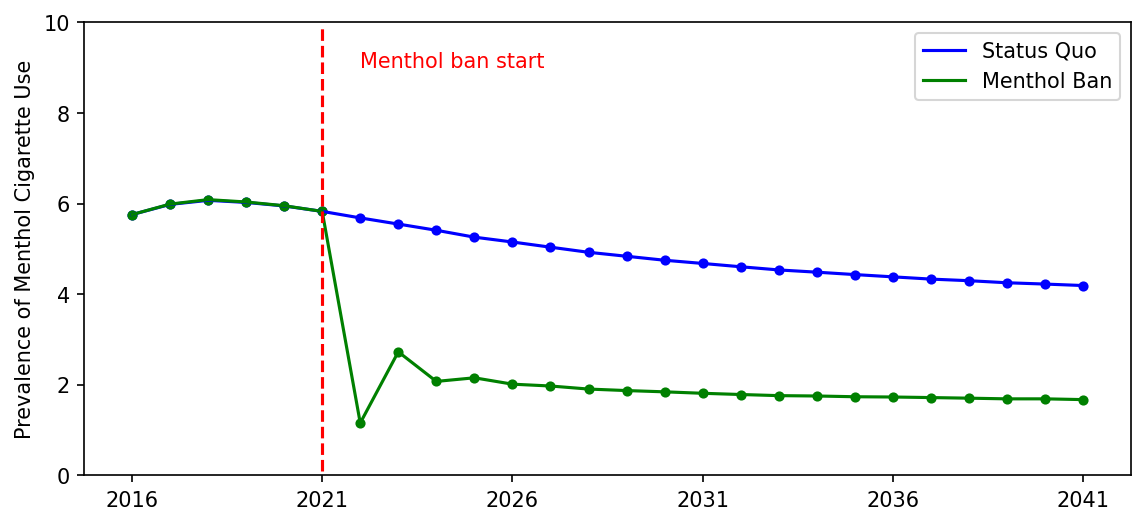

In [62]:
fig, ax = plt.subplots(1,1,figsize=(9,4),dpi=150)
start = 2016
end = 2016 + menthol_mb.shape[0]
x0 = np.arange(start,end)
ax.set_xticks(np.arange(start, end, 5))
ax.plot(x0, menthol_sq * 100, c='b')
ax.plot(x0, menthol_mb * 100, c='g')
ax.scatter(x0, menthol_sq  * 100, c='b', s=15)
ax.scatter(x0, menthol_mb  * 100, c='g', s=15)
ax.legend(labels=[
    f"Status Quo", 
    f"Menthol Ban", 
])
ax.axvline(2021, ymin=0.01, ymax=0.99, color='r', linestyle='dashed')
ax.text(2022, 9, "Menthol ban start", c='r')
ax.set_ylabel("Prevalence of Menthol Cigarette Use")
plt.ylim(0, 10)

(0.0, 10.0)

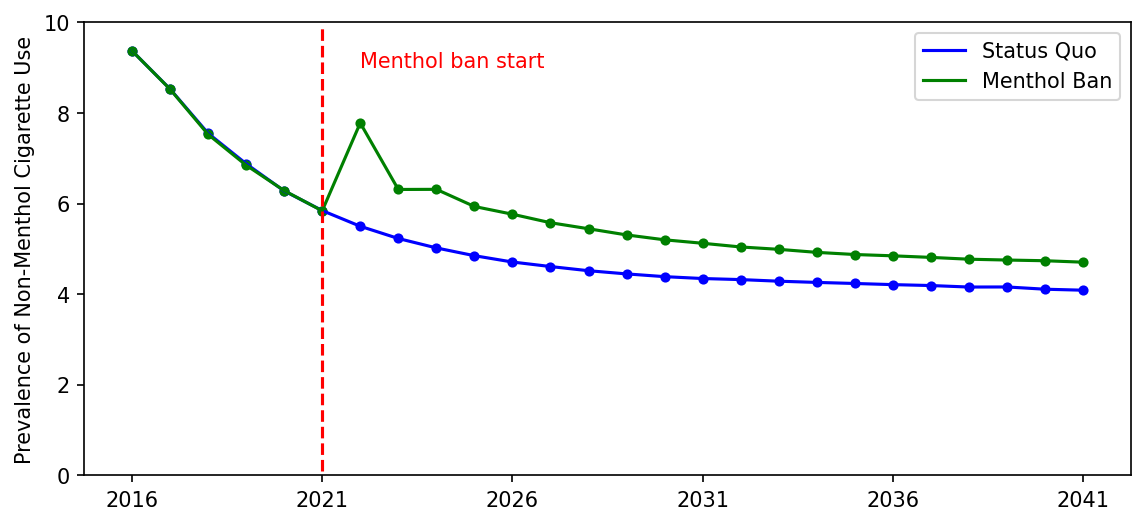

In [63]:

fig, ax = plt.subplots(1,1,figsize=(9,4),dpi=150)
start = 2016
end = 2016 + menthol_mb.shape[0]
x0 = np.arange(start,end)
ax.set_xticks(np.arange(start, end, 5))
ax.plot(x0, nonmenthol_sq * 100, c='b')
ax.plot(x0, nonmenthol_mb * 100, c='g')
ax.scatter(x0, nonmenthol_sq  * 100, c='b', s=15)
ax.scatter(x0, nonmenthol_mb  * 100, c='g', s=15)
ax.legend(labels=[
    f"Status Quo", 
    f"Menthol Ban", 
])
ax.axvline(2021, ymin=0.01, ymax=0.99, color='r', linestyle='dashed')
ax.text(2022, 9, "Menthol ban start", c='r')
ax.set_ylabel("Prevalence of Non-Menthol Cigarette Use")
plt.ylim(0, 10)

(0.0, 16.0)

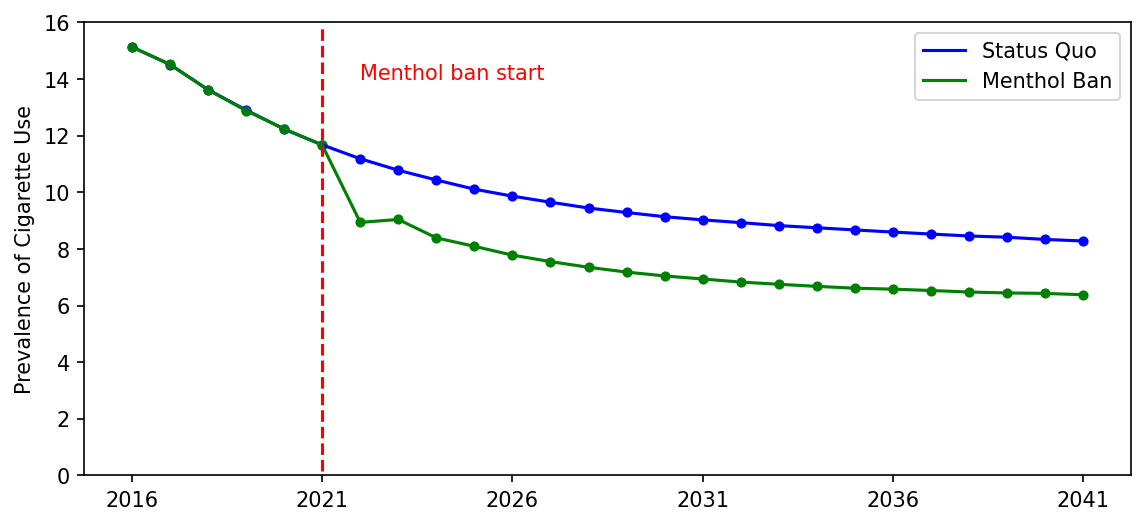

In [64]:
fig, ax = plt.subplots(1,1,figsize=(9,4),dpi=150)
start = 2016
end = 2016 + menthol_mb.shape[0]
x0 = np.arange(start,end)
ax.set_xticks(np.arange(start, end, 5))
ax.plot(x0, smoker_sq * 100, c='b')
ax.plot(x0, smoker_mb * 100, c='g')
ax.scatter(x0, smoker_sq  * 100, c='b', s=15)
ax.scatter(x0, smoker_mb  * 100, c='g', s=15)
ax.legend(labels=[
    f"Status Quo", 
    f"Menthol Ban", 
])
ax.axvline(2021, ymin=0.01, ymax=0.99, color='r', linestyle='dashed')
ax.text(2022, 14, "Menthol ban start", c='r')
ax.set_ylabel("Prevalence of Cigarette Use")
plt.ylim(0, 16)